# Customer churn prediction for fitness club

**Goal**: Conduct an analysis and prepare a customer retention action plan.

<br>**Tasks**:
 - learn to predict the probability of outflow (at the level of the next month) for each client;
 - to form typical client portraits: identify several of the most striking groups and characterize their main properties;
 - analyze the main features that most strongly affect the outflow;
 - formulate the main conclusions and develop recommendations for improving the quality of work with clients:
 <br>1) identify target groups of customers;
 <br>2) suggest ways to reduce the outflow;
 <br>3) identify additional aspects of customer interaction.

**Table of Contents**
<br><a href="#1">1 Data load and preprocessing</a>
<p style="margin-left: 20px"><a href="#11">1.1 Conclusion</a></p>
<br><a href="#2">2 Exploratory data analysis (EDA)</a>
<p style="margin-left: 20px"><br>
<a href="#21">2.1 Missing features, means and standard deviations</a>
<br><a href="#22">2.2 Mean values of features in two groups</a>
<br><a href="#23">2.3 Bar charts and histograms</a>
<br><a href="#24">2.4 Correlation matrix</a>
<br><a href="#25">2.5 Conclusion</a></p>

<br><a href="#3">3. Churn Prediction Model</a>
<p style="margin-left: 20px"><br><a href="#31">3.1 Split of dataframe into train and test subsets</a>
<br><a href="#32">3.2 Model training with Logistic Regression</a>
<br><a href="#33">3.3 Model training with Random Forest</a>
<br><a href="#34">3.4 Accuracy, precision and recall</a>
<br><a href="#35">3.5 Conclusion</a></p>

<br><a href="#4">4 Customer Clustering</a>
<p style="margin-left: 20px"><br><a href="#41">4.1 Data standardization</a>
<br><a href="#42">4.2 Distance matrix</a>
<br><a href="#43">4.3 K-means clustering algorithm</a>
<br><a href="#44">4.4 Mean values of features for clusters</a>
<br><a href="#45">4.5 Feature distributions for clusters</a>
<br><a href="#46">4.6 Churn share by cluster</a>
<br><a href="#47">4.7 Conclusion</a></p>

<br><a href="#5">5 Conclusions and recommendations</a>

<a id="1"></a>

##  Data load and preprocessing

In [ ]:
!pip install seaborn -U

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [3]:
# read of data
gym_churn = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym_churn.sample(n = 10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2898,0,0,0,0,1,1,0,27,49.935942,1.0,1,2.333379,1.775802,1
1036,0,0,1,0,1,1,0,32,63.672700,1.0,8,1.575633,1.616485,0
1837,0,1,0,0,1,1,0,29,99.245578,1.0,1,1.357434,1.199090,1
1665,1,1,1,1,1,12,1,30,345.848197,12.0,2,2.723316,2.782531,0
182,0,0,0,0,1,1,0,28,56.183115,1.0,3,2.896515,2.974812,0
721,1,1,1,0,1,6,1,24,16.025221,6.0,4,1.104506,0.000000,1
2452,0,1,0,0,1,1,1,25,19.578448,1.0,3,0.456524,0.000000,1
1355,0,1,0,0,1,6,0,30,17.786403,5.0,3,3.882434,4.070844,0
1172,1,1,0,0,1,1,1,26,225.083501,1.0,11,1.341432,1.310975,0
3624,0,1,1,1,1,6,0,26,145.146109,6.0,0,1.532891,0.696627,1


In [6]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Variables have different standard deviations, which means standartization will be needed prior to train of the model.

In [7]:
# analysis of dataset fields
for i in gym_churn.columns:
    print(i)
    print(gym_churn[i].unique())

gender
[1 0]
Near_Location
[1 0]
Partner
[1 0]
Promo_friends
[1 0]
Phone
[0 1]
Contract_period
[ 6 12  1]
Group_visits
[1 0]
Age
[29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
Avg_additional_charges_total
[ 14.22747042 113.20293765 129.44847933 ...  78.25054157  61.91265691
 178.86181361]
Month_to_end_contract
[ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
Lifetime
[ 3  7  2  0  1 11  4  8 14  6  5 15 12 21 10 20  9 13 17 16 24 22 31 26
 23 18 19 27 29]
Avg_class_frequency_total
[0.02039795 1.92293606 1.85909835 ... 2.78614636 1.63010814 1.10183221]
Avg_class_frequency_current_month
[0.         1.91024352 1.73650189 ... 2.8314395  1.59623664 1.03526976]
Churn
[0 1]


Gender, Near_Location, Partner, Promo_friends, Phone, Churn - binary columns.

In [8]:
# duplicates check
gym_churn[gym_churn.duplicated()]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


In [9]:
# converting column names to lower case
gym_churn.columns = gym_churn.columns.str.lower()
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

<a id="11"></a>

### Conclusions

The dataset contains data for the month before the churn and the fact of the churn for a certain month.
<br>Fields in dataset:
<br>'gender' — gender;
<br>'Near_Location' - living or working in the area where the fitness center is located;
<br>'Partner' — an employee of the club's partner company (cooperation with companies whose employees can receive discounts on a membership — in this case, the fitness center stores information about the client's employer);
<br>'Promo_friends' — the fact of the initial registration as part of the "bring a friend" promotion (used a promo code from a friend when paying for the first subscription);
<br>'Phone' — availability of a contact phone number;
<br>'Age' — age;
<br>'Lifetime' is the time since the first access to the fitness center (in months).
<br>'Contract_period' — duration of the current active subscription (month, 3 months, 6 months, year);
<br>'Month_to_end_contract' — term until the end of the current active subscription (in months);
<br>'Group_visits' — the fact of participating in group lessons;
<br>'Avg_class_frequency_total' — the average number of visits per week since the beginning of the subscription;
<br>'Avg_class_frequency_current_month' — average frequency of visits per week for the previous month;
<br>'Avg_additional_charges_total' — total revenue from the fitness center's other services: cafe, sports goods, beauty and massage salon.

The dataset has 4000 rows and 14 columns.
All columns are in numeric format, mostly integer, but there is also a float type - Avg_additional_charges_total, Month_to_end_contract, Avg_class_frequency_total, Avg_class_frequency_current_month.
There are no duplicates or gaps in the data.
Column names have been converted to lower case.

<a id="2"></a>

## Exploratory data analysis (EDA)

<a id="21"></a>

### Missing features, means and standard deviations

In my opinion, the dataset lacks the "date of the last visit" attribute for a more accurate definition of dropped clients. Because in the Avg_class_frequency_current_month feature, you can only see the average number of visits for the previous month, but it is possible that people went on vacation or were on sick leave and did not visit the hall last month, so it is important to understand how many months this trend continues. If a person is absent for 2-3 months, as it seems to me, he can already be attributed to the group of those who abandoned classes.

<a id="22"></a>

### Mean values of features in two groups

In [10]:
gym_churn.groupby('churn').mean().round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


In the group of the rest, there are more people who live or work near the club. I think this is an important factor. In the same group, there are more people who bought a subscription under the affiliate program and came through the "bring a friend" promotion. This sign is also important, since, for many, the social component is important. If their friends go to the same hall, they have someone to keep company with.

In the churn group, the sign month_to_end_contract is significantly lower. It is likely that people who have just bought a subscription actively use it, and closer to the end of the term, they begin to quit classes. But also, the term of subscriptions (contract_period) in this group is shorter than in the remaining ones. I can assume that the shorter the subscription, the cheaper it costs and people do not feel sorry for the money spent to force themselves to do it. In the churn group, fewer people attend group classes, they are younger, and they spend less on extra services.

In the previous month, clients from the churn group were twice as likely to attend classes compared to those who remained.

<a id="23"></a>

### Bar charts and histograms

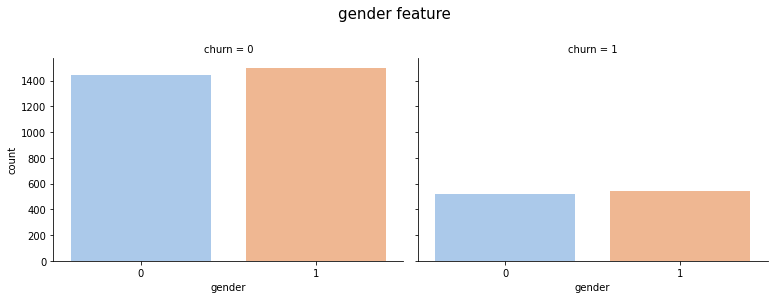

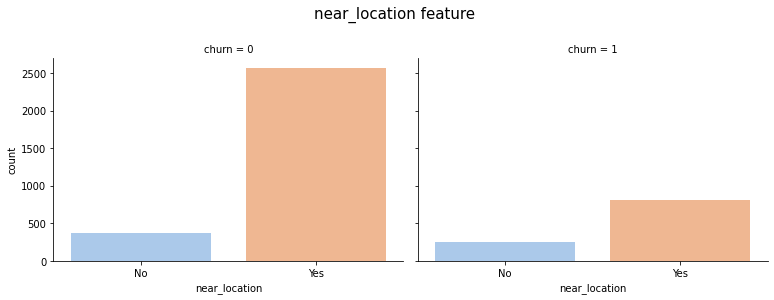

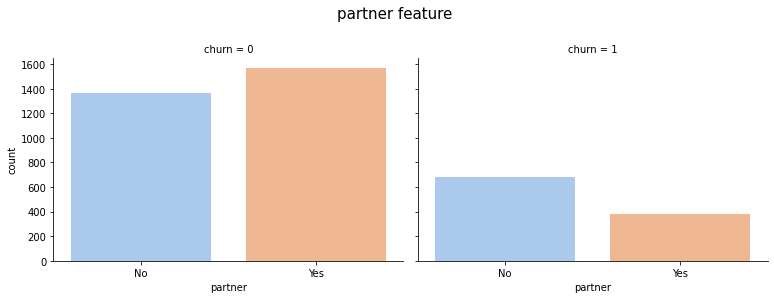

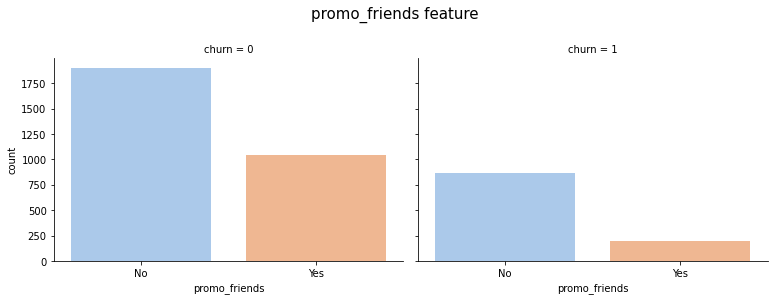

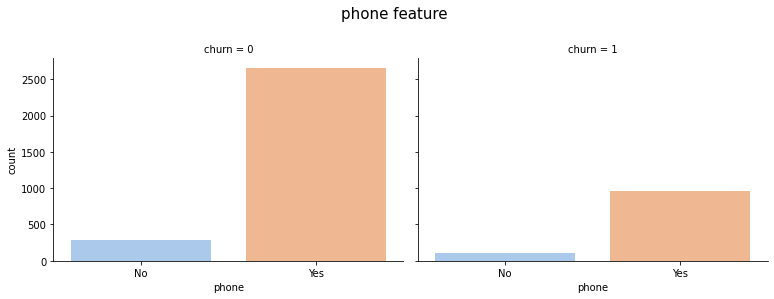

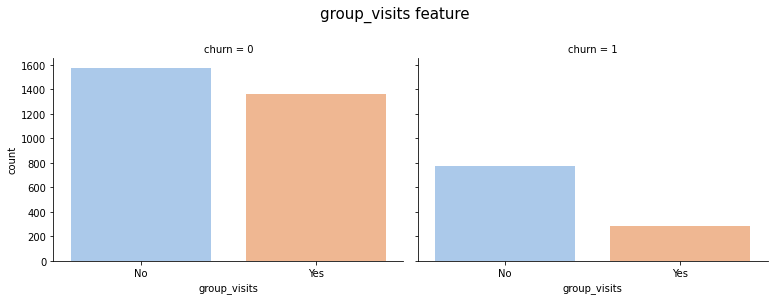

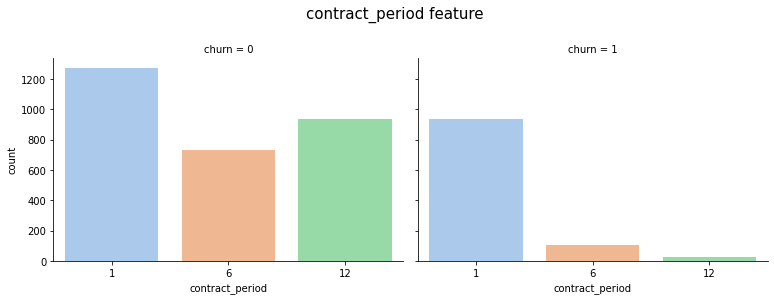

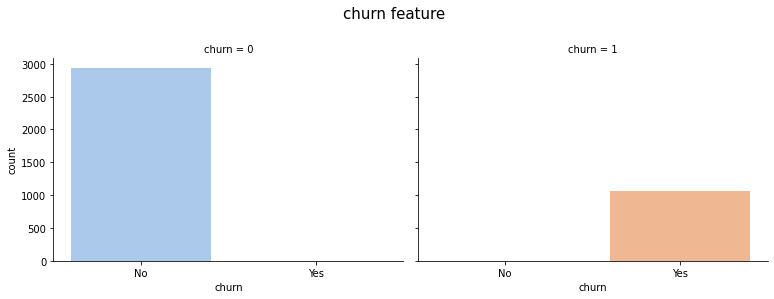

In [11]:
# plotting of bar plots
warnings.filterwarnings("ignore")
binar_data = gym_churn[['gender', 'near_location', 'partner','promo_friends', 'phone', 'group_visits', 'contract_period', 
                        'churn']]
binar_col = binar_data.columns
for i in binar_col:
    ax = sns.catplot(i, col="churn", data = binar_data, kind="count", height=4, aspect=4/3, palette="pastel")
    if i == 'contract_period' or i == 'gender':
        pass
    else:
        ax.set_xticklabels(["No", "Yes"]) 
    ax.fig.subplots_adjust(top=0.8)
    title = str(i) +' feature'
    ax.fig.suptitle(title, fontsize = 15)
    plt.show()

It can be seen from the graphs that among those who left, the percentage of those who came through an affiliate program is lower than those who bought a subscription on their own. It can also be seen that among those who left, there are mainly subscriptions for one month. Those who left were also less likely to attend group classes.

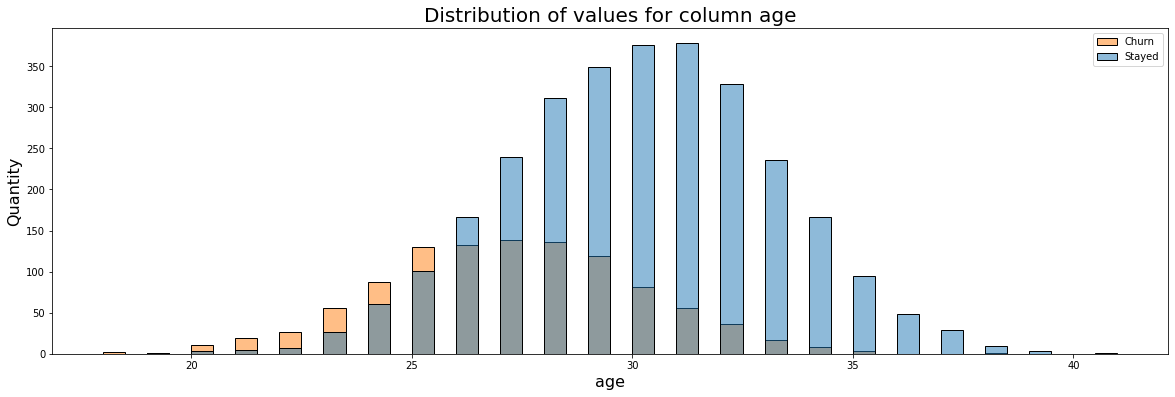

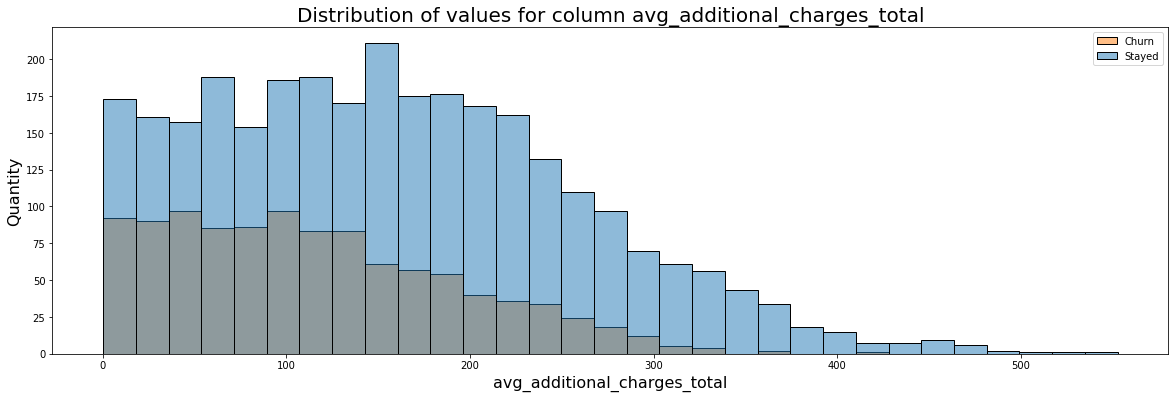

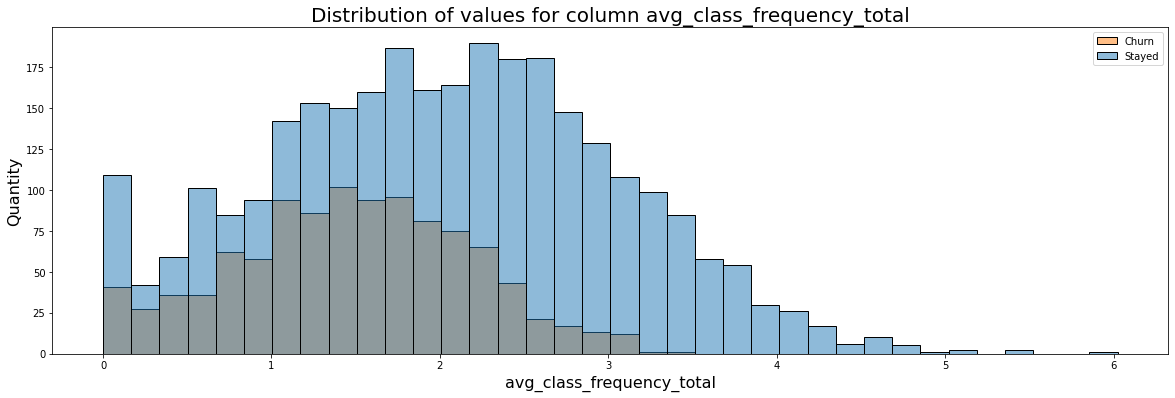

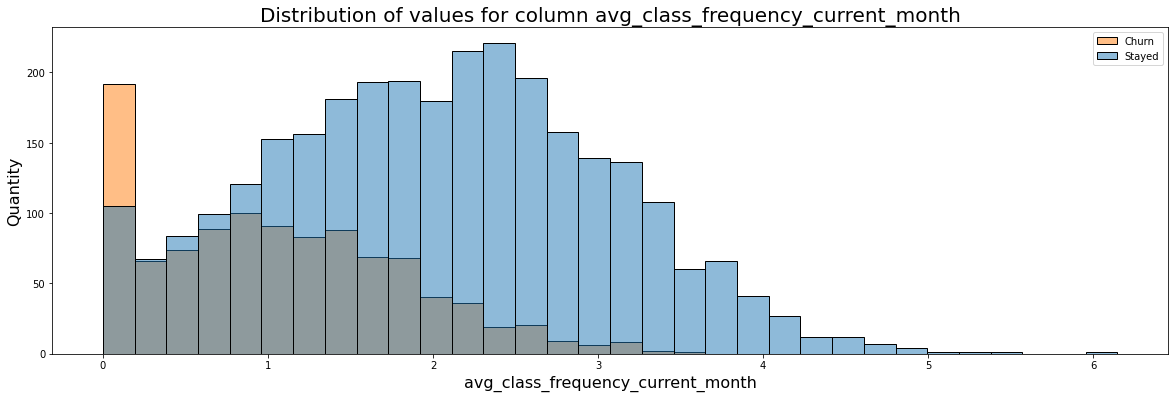

In [12]:
# plotting of histograms
plot_columns = ['age','avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
for i in plot_columns:
    fig = plt.gcf()
    fig.set_size_inches(20, 6)
    sns.histplot(data=gym_churn, x=i, hue="churn")
    name = 'Distribution of values for column '+str(i)
    plt.title(name, fontsize = 20)
    plt.legend(labels = ('Churn', 'Stayed'))
    plt.xlabel(i, fontsize = 16)
    plt.ylabel('Quantity', fontsize = 16)

    plt.show()

Findings:
  - a group of those who left younger than those who remained;
  - those who left spend less on additional services;
  - the number of visits in the outflow group is lower than in the remaining ones;
  - those who left in the previous month visited the hall much less, almost twice as many as those who did not appear even once in the last month;

<a id="24"></a>

### Correlation matrix

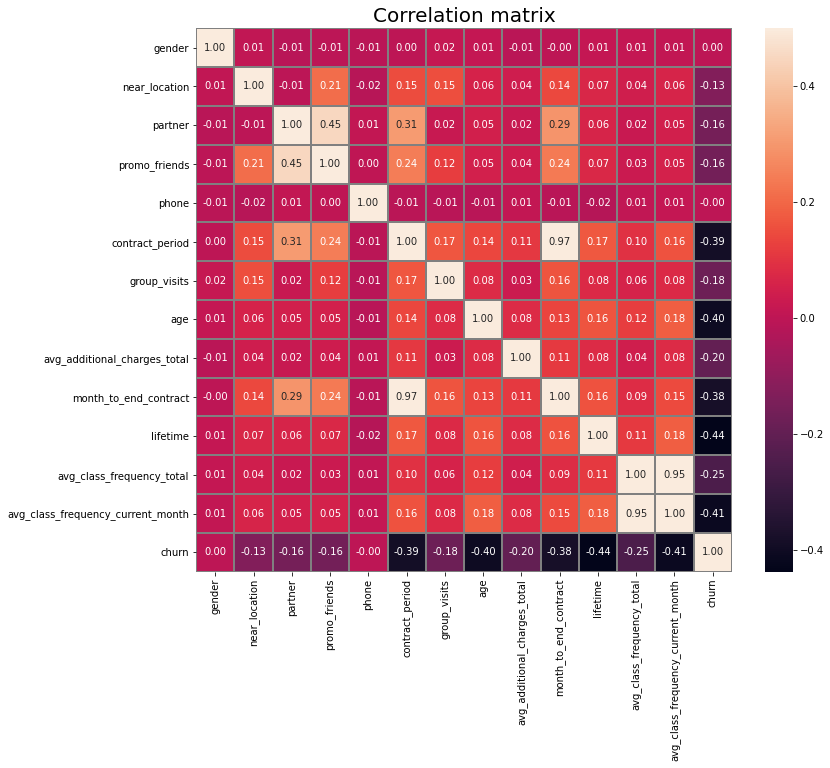

In [13]:
matrix = gym_churn.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, fmt = '.2f', linewidths=1, linecolor='gray', vmax = 0.5)
plt.title('Correlation matrix', fontsize=20)
plt.show()

It can be seen from the correlation matrix that the strongest relationship is between the features contract_period and month_to_end_contract, as well as between avg_class_frequency_total and avg_class_frequency_current_month. Which is quite logical, the number of months before the end of the contract should be no more than the total duration of the contract. One variable from a pair of multicollinear ones should be removed, otherwise it will dominate during training.

<a id="25"></a>

### Conclusions

After comparing the averages of the two groups, I found that:
 - In the previous month, clients from the churn group attended classes twice as rarely compared to the remaining ones.
 - In the churn group, fewer people attend group classes, they are younger, and they spend less on additional services.
 - Among the rest, there are more people who live or work near the club.
 - The subscription period in the outflow group was significantly shorter than that of those who remained.
 
From the columnar histograms, it can be seen that among those who left, the percentage of those who came through an affiliate program is lower than those who bought a subscription on their own. It can also be seen that among those who left, there are mainly subscriptions for 1 month. Those who left were also less likely to attend group classes.

From the histograms of the distribution, I made the following conclusion:
 - a group of those who left younger than those who remained;
 - those who left spend less on additional services;
 - the number of visits in the outflow group is lower than in the remaining ones;
 - those who left in the previous month visited the hall much less, almost twice as many as those who did not appear even once in the last month;
 
It can be seen from the correlation matrix that the strongest relationship is between the features contract_period and month_to_end_contract, as well as between avg_class_frequency_total and avg_class_frequency_current_month. Quite logically, the number of months until the end of the contract should be no more than the total duration of the contract.

<a id="3"></a>

## Churn Prediction Model

Building a model of binary classification of clients, where the target feature is the fact of the outflow of the client in the next month:

<a id="31"></a>

### Split of dataframe into train and test subsets

In [14]:
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

<a id="32"></a>

### Model training with Logistic Regression

In [15]:
lr_model = LogisticRegression(random_state=0) 
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test) 

<a id="33"></a>

### Model training with Random Forest

In [16]:
rf_model = RandomForestClassifier(n_estimators = 20, random_state = 0) 
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

<a id="34"></a>

### Accuracy, precision and recall

In [17]:
def print_all_metrics(y_true, y_pred, title='Metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [18]:
print_all_metrics(y_test, lr_predictions, title='Metrics for the logistic regression model:',)
print()
print_all_metrics(y_test, rf_predictions, title = 'Metrics for the random forest model:')

Metrics for the logistic regression model:
	Accuracy: 0.92
	Precision: 0.89
	Recall: 0.81

Metrics for the random forest model:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.81


The accuracy, precision and recall metrics are slightly higher for the logistic regression model, this model is the most optimal.

<a id="35"></a>

### Conclusions

I split the dataset into training and validation sets, and I trained the model in two ways:
 - logistic regression
|Accuracy|Precision|Recall|
|:----|:----|:----|
|0.92|0.89|0.81|

 - random forest
|Accuracy|Precision|Recall|
|:----|:----|:----|
|0.92|0.88|0.81|

The logistic regression model performs better.

<a id="4"></a>

## Customer Clustering

<a id="41"></a>

### Data standardization

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(gym_churn.drop(columns = ['churn']))

<a id="42"></a>

### Distance matrix

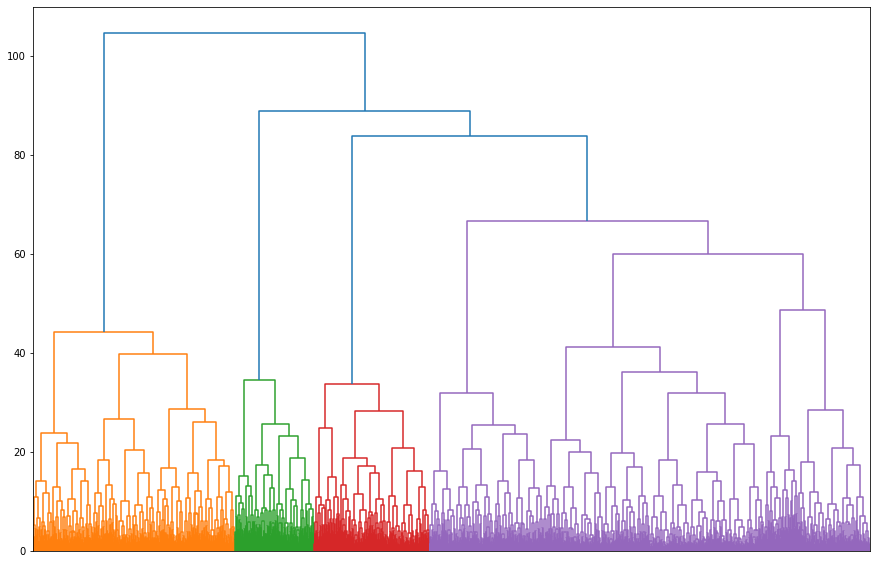

In [20]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.show() 

Suggested optimal number of clusters is **4**

<a id="43"></a>

### K-means clustering algorithm

In [21]:
km = KMeans(n_clusters = 4, random_state = 0)
labels = km.fit_predict(X_sc)

<a id="44"></a>

### Mean values of features for clusters

In [22]:
gym_churn['cluster_km'] = labels
gym_churn.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838
2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715
3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685


The clusters with the lowest churn are 0 and 4. In these groups, clients made the most visits to group classes, were the most "aged", spent the most money, went to the club the longest, made the most visits per week, and went to the club, more often than others.
In cluster 1 no one indicated a phone number, in cluster 2 there are no people living near the club, in cluster 3 the contract_period is the lowest.

<a id="45"></a>

### Feature distributions for clusters

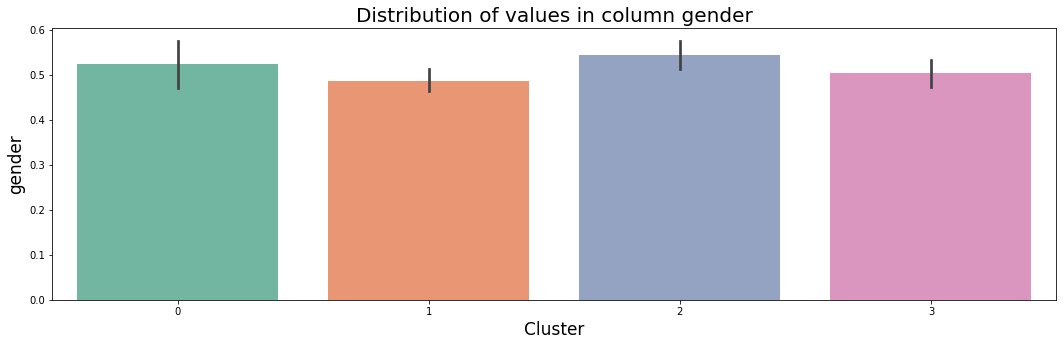

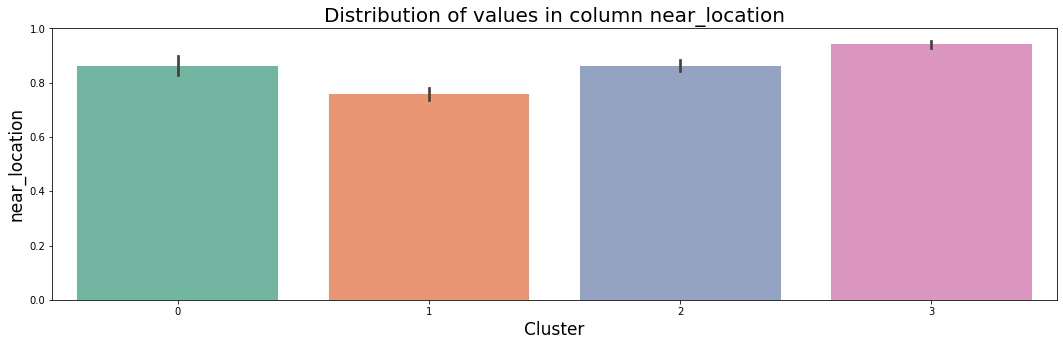

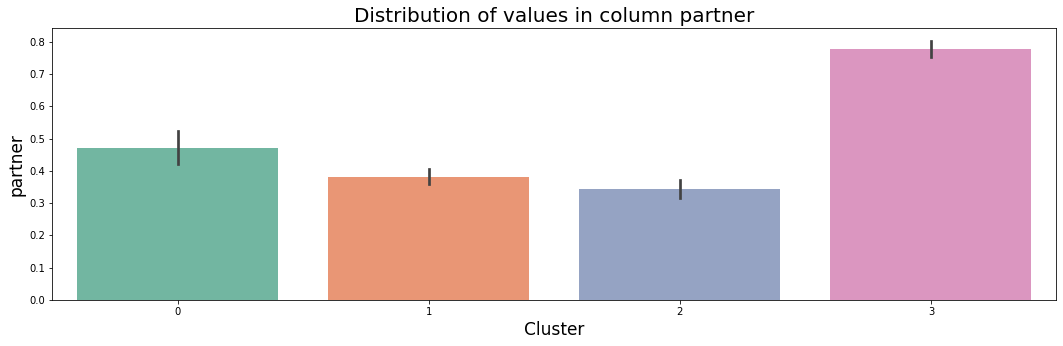

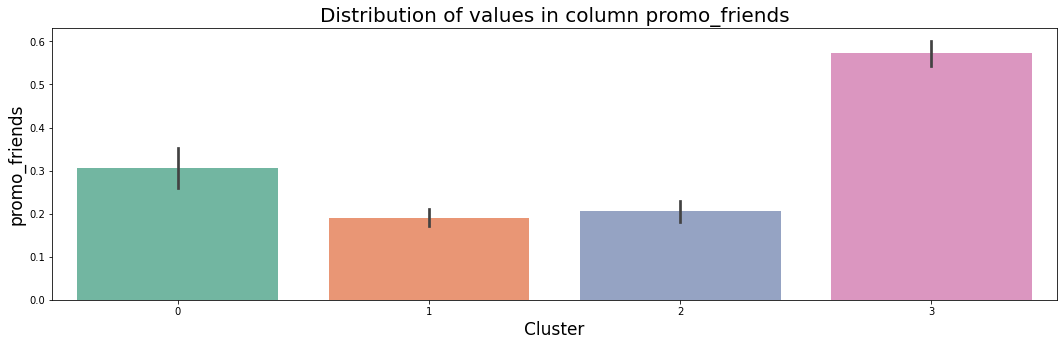

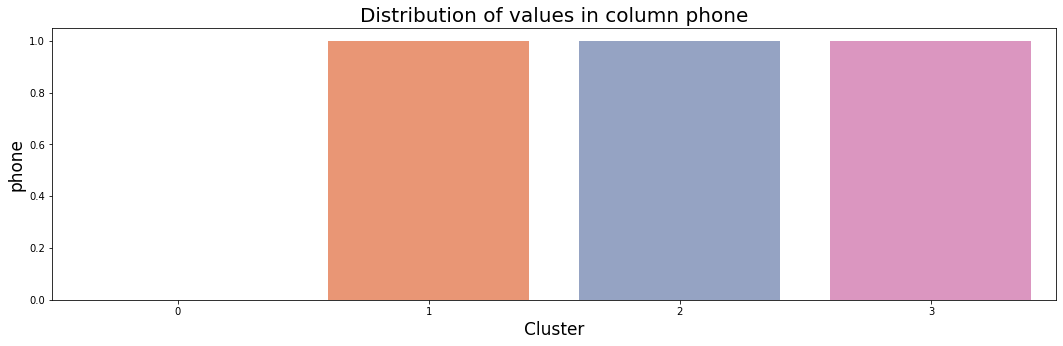

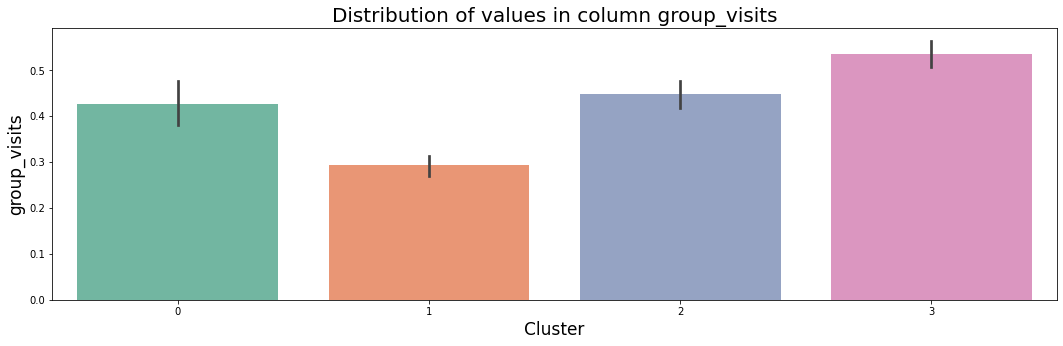

In [23]:
col_names = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
for i in col_names:
    plt.figure(figsize=(18, 5))
    ax = sns.barplot(y = gym_churn[i], x=gym_churn['cluster_km'], palette='Set2')
    name = 'Distribution of values in column '+str(i)
    ax.set_xlabel("Cluster",fontsize=17)
    ax.set_ylabel(i,fontsize=17)
    plt.title(name, fontsize = 20)
    plt.show()

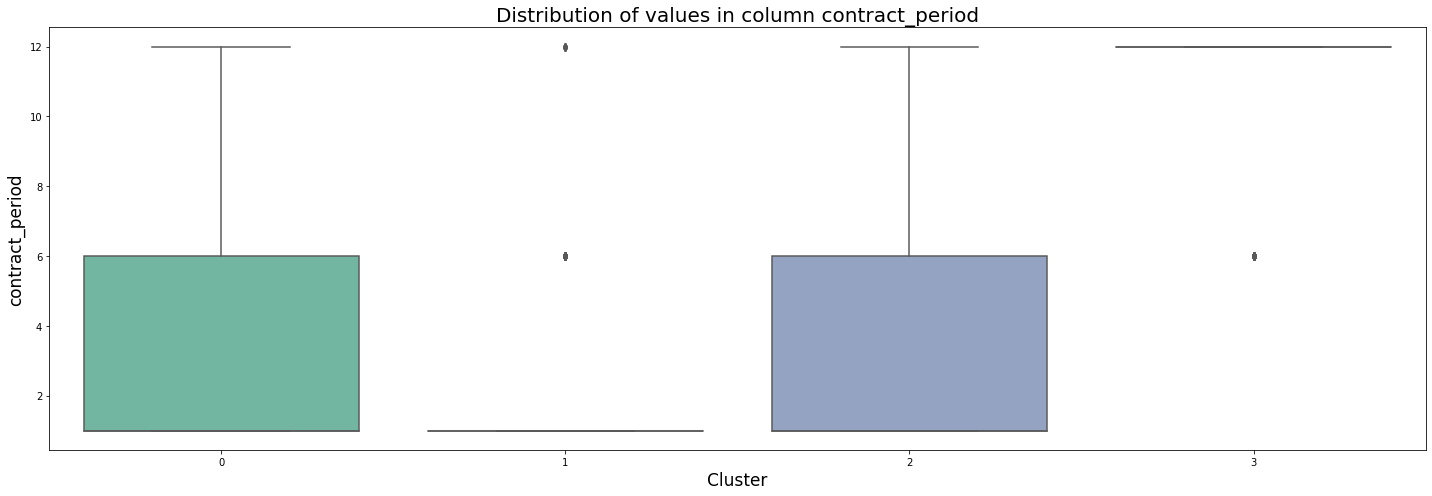

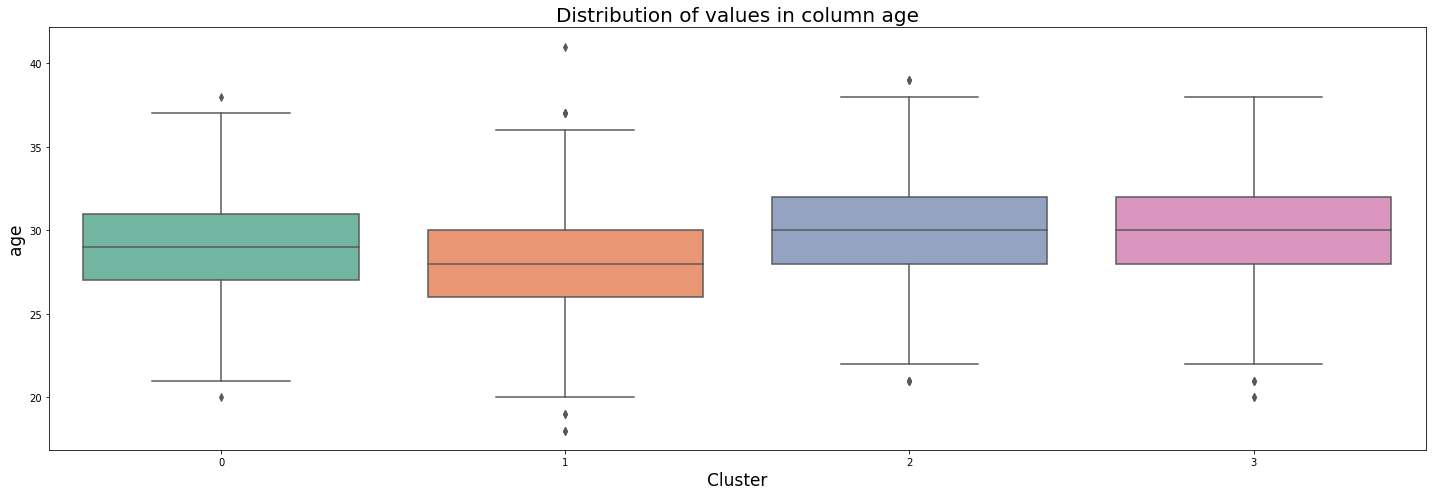

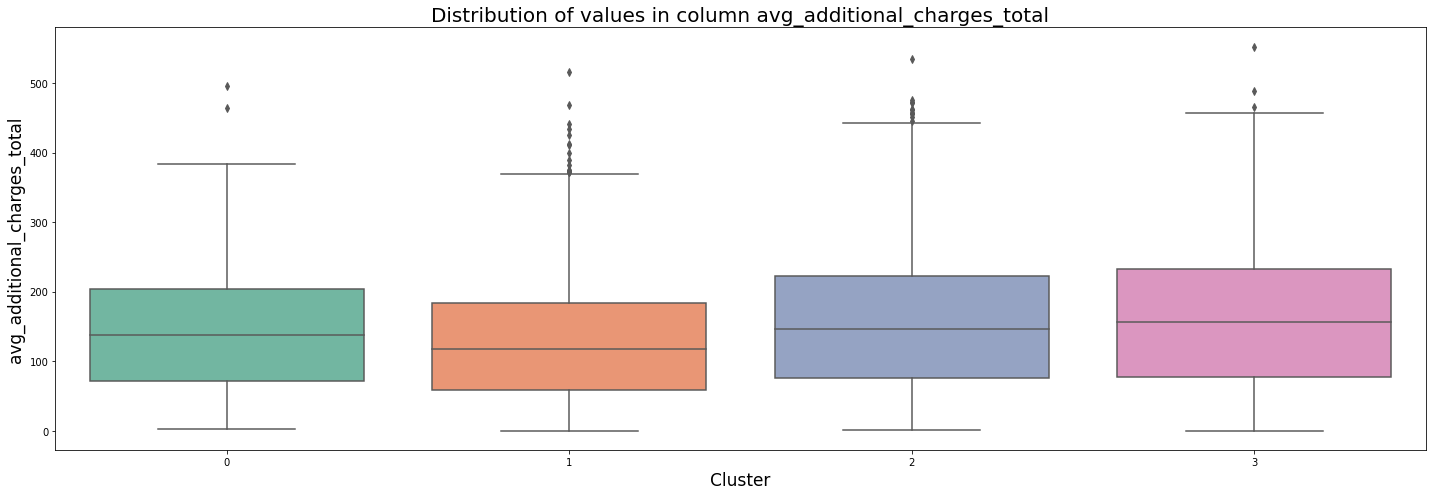

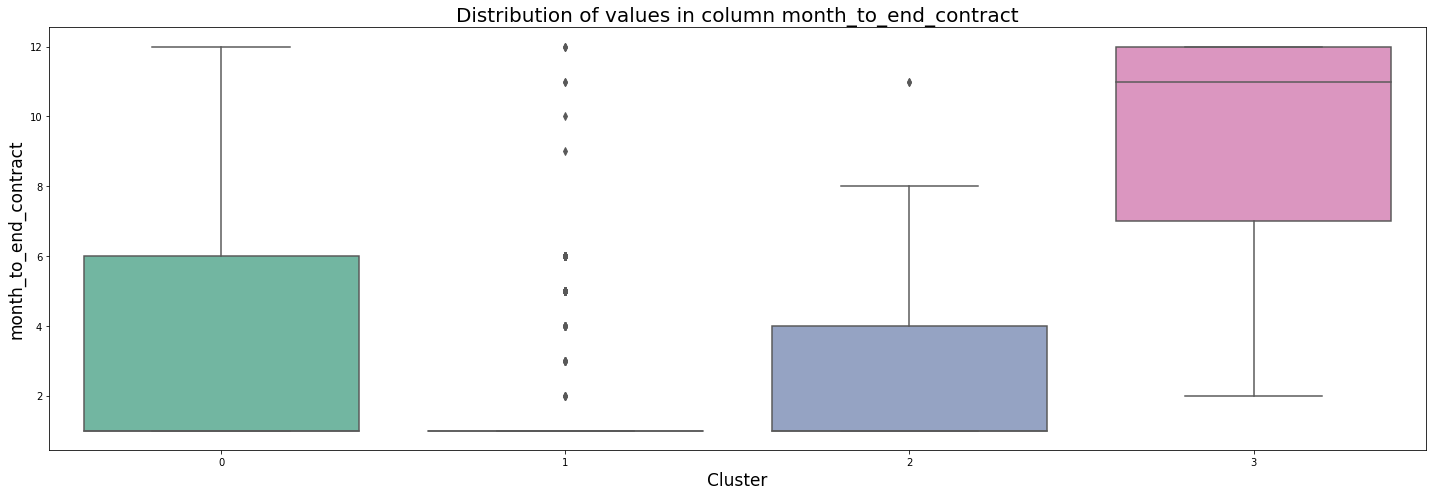

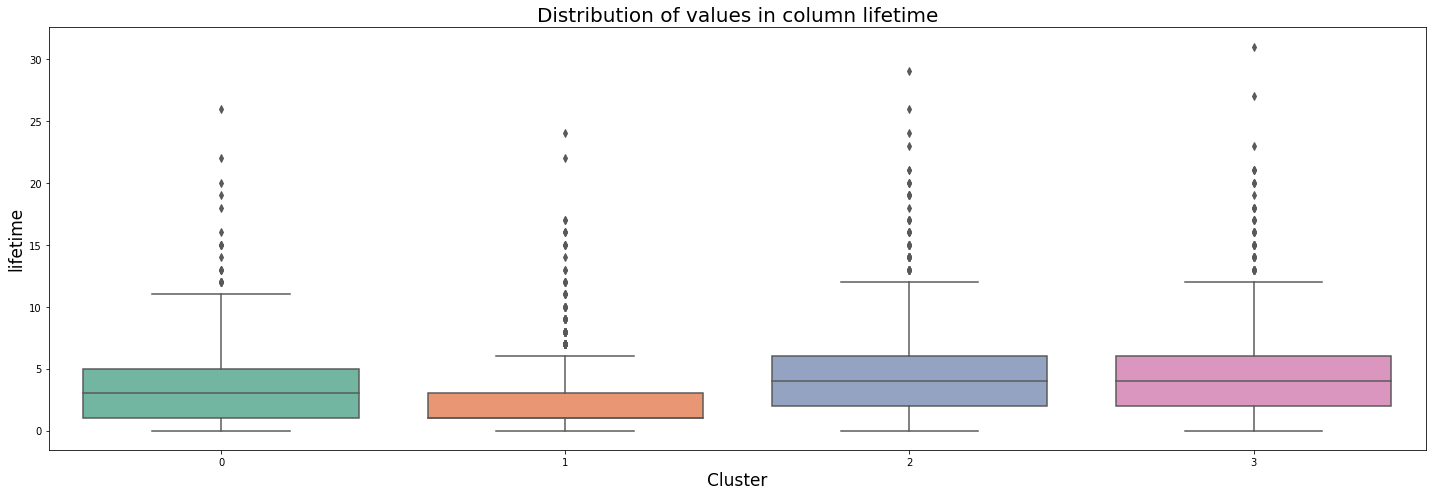

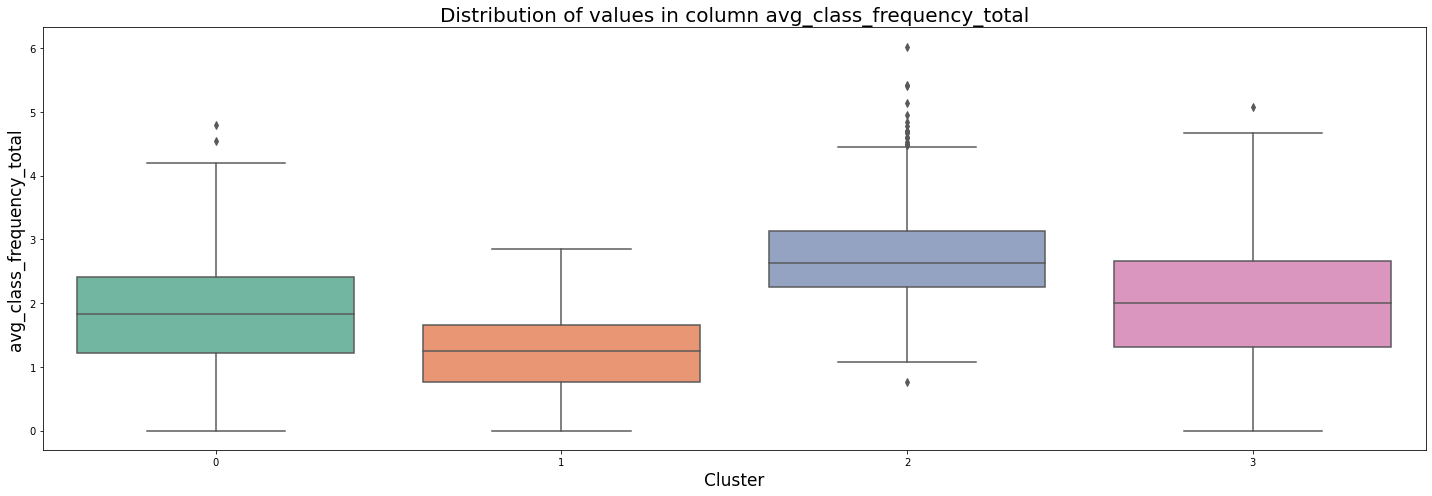

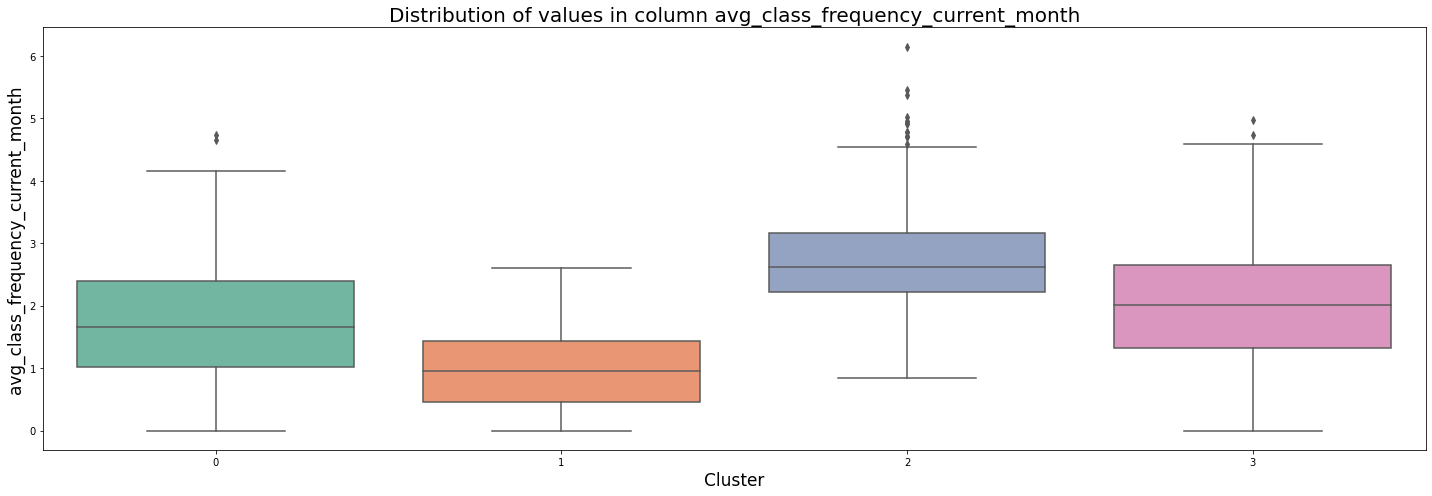

In [24]:
col_names = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
for i in col_names:
    fig = plt.gcf()
    fig.set_size_inches(20, 7)   
    ax = sns.boxplot( x=gym_churn['cluster_km'], y=gym_churn[i], palette="Set2");
    ax.set_xlabel("Cluster",fontsize=17)
    ax.set_ylabel(i,fontsize=17)
    plt.title('Distribution of values in column '+str(i), fontsize = 20)
    plt.tight_layout()
    plt.show()

It can be seen from the histogram that the longest contracts were concluded with clients from cluster 3. They also have the most months left until the end of the contract, and they attend group classes more than others. Also, more often than others, representatives of this class were registered under referral and affiliate programs.

Most often, representatives of the 2nd cluster visited the gym.

Representatives of cluster 1 are slightly younger than the rest, and they also spend less on additional services. This group visited the gym less frequently than others, and group classes in particular.

<a id="46"></a>

### Churn share by cluster

In [25]:
gym_churn.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.266839
1    0.559838
2    0.092715
3    0.029685
Name: churn, dtype: float64

The most reliable clusters are 2 and 3.
Cluster 1 is the most prone to outflow.

<a id="47"></a>

### Conclusions

The data was standardized, a distance matrix was built, and customer clusters were predicted using the K-Means algorithm. The mean values of features for clusters were analyzed, and histograms of the feature distribution were constructed.
<br>As a result, the most reliable clusters were determined - 2 and 3.
<br>Cluster 1 is the most prone to churn.

<a id="5"></a>

## Conclusions and recommendations

During the project, the goal was to analyze and prepare an action plan to retain clients of the fitness club.

For this, the following steps were taken:
 - data preparation
 - exploratory data analysis
 - created a model for predicting customer churn
 - clients clusterization

The gym_churn.csv file was provided as initial data, which contains customer data for the previous month, before checking the fact of the outflow and information based on the visit log.

The first stage was the loading and preprocessing of the received data: studying the general information, checking for duplicates and omissions, renaming the columns.

Next, I did an exploratory data analysis:
- In the previous month, clients from the churn group attended classes twice as rarely compared to the remaining ones.
- In the churn group, fewer people attend group classes, they are younger, and they spend less on additional services.
- Among the rest there are more people who live or work near the club.
- The subscription period in the outflow group was significantly shorter than that of those who remained, mainly subscriptions for 1 month.
- Among those who left, the percentage of those who came through an affiliate program is lower than those who bought a subscription on their own. -

The next step was splitting the data into training and validation sets, training two models and comparing their results. The logistic regression model showed itself to be better for predicting customer churn:

|Accuracy|Precision|Recall|
|:----|:----|:----|
|0.92|0.89|0.81|


The final step was client clustering using the distance matrix and the K-Means algorithm. A total of 4 clusters were identified. As a result, the most reliable clusters were identified - 2 and 3. Cluster 1 is the most prone to outflow.

Churn rate by cluster:

|Cluster|Churn share|
|:----|:----|
|0|0.266839|
|1|0.559838|
|2|0.092715|
|3|0.029685|

**Recommended strategy**:

1) Maintain the employer referral program and affiliate program;
<br>2) start advertising group programs to existing clients, hang posters with information in the locker rooms, send newsletters in the application or via email / sms;
<br>3) those who purchased a month-long subscription but have never visited the gym to offer the service of a preferential extension of the subscription;
<br>4) offer a discount on the next subscription for 3 or 6 months to new customers who come for a month without a discount on the affiliate program.